### Test speakers through USB sound dongle
R.Sprik 6/6/2024

In [1]:
import sounddevice as sd
import matplotlib.pyplot as plt

### select a working backend
#%matplotlib widget 
%matplotlib qt5

# get available devices
# print (sd.query_devices())
dev_in = sd.query_devices("UMA16v2")
dev_out = sd.query_devices("USB Audio Device") # for red boxes

input_device_id = dev_in['index']
output_device_id = dev_out['index']
print(f"Found devices: in:{input_device_id} out:{output_device_id}")

# default settings
Fs           = 48000
nchan_in     = 16
nchan_out    = 2
sd.default.samplerate = Fs
sd.default.channels   = [nchan_in, nchan_out]
sd.default.device     = [input_device_id, output_device_id]

npt = 128*1024 # per channel
dur = npt/Fs
print(f"npt = {npt}")
print(f"Fs  = {Fs} S/s")
print(f"dur = {dur} s")

# print(">>> Start recording for %5.2fs (%d samples per ch)" % (dur, npt))
# rec = sd.rec(npt, device = indev)
# sd.wait()
print(sd.query_devices())
print("Done.")


Found devices: in:1 out:0
npt = 131072
Fs  = 48000 S/s
dur = 2.7306666666666666 s
< 0 USB Audio Device: - (hw:2,0), ALSA (1 in, 2 out)
> 1 UMA16v2: USB Audio (hw:3,0), ALSA (16 in, 2 out)
  2 pulse, ALSA (32 in, 32 out)
  3 default, ALSA (32 in, 32 out)
Done.


### Generate stereo sound on boxes

(131072, 2)


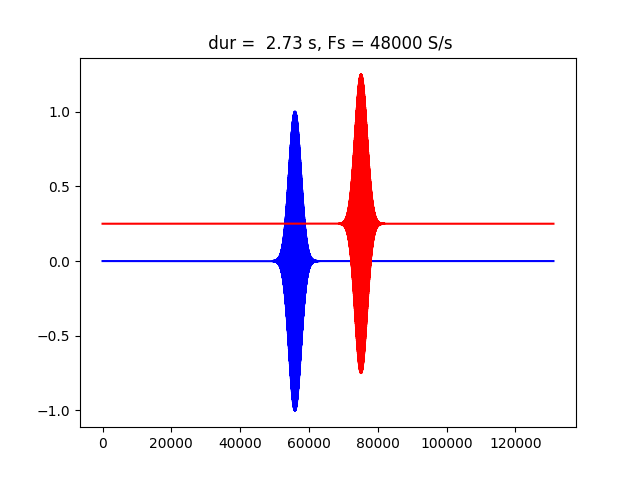

In [35]:
import numpy as np
from signals import SineWave, PulseWave

# outsmp = SineWave(npt, Fs, 1600, amp=0.2)

aamp = 1.0
s1 = PulseWave(npt, Fs, 2000, amp=aamp, width = 0.05, tshift = -0.2)
s2 = PulseWave(npt, Fs, 1000, amp=aamp, width = 0.05, tshift =  0.2)
outsmp = np.zeros((npt,2))
outsmp[:,0] = s1
outsmp[:,1] = s2

print(np.shape(outsmp))

# Plot output wave
plt.close("all")
plt.figure(10)
plt.plot(outsmp[:,0], 'b-')
pltoff = 0.25
plt.plot(outsmp[:,1]+pltoff, 'r-')
plt.title(" dur = %5.2f s, Fs = %5.0f S/s" % (dur, Fs))
plt.show()

### Play sound

In [36]:
sd.play(outsmp)

### Make a recording with sound source playing

playrec:


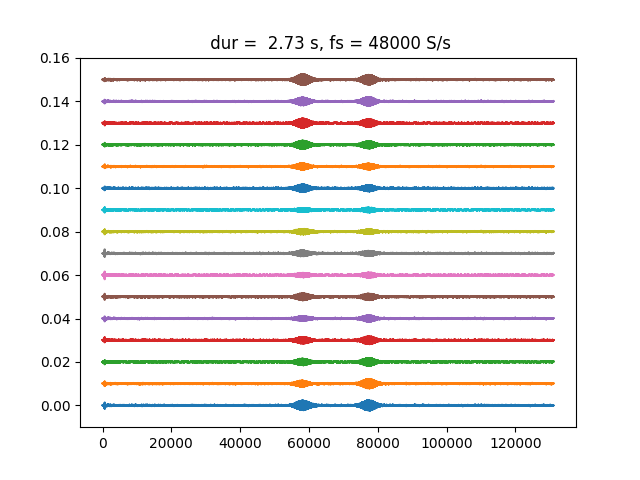

done.


In [37]:
print("playrec:")
insmp = sd.playrec(outsmp, samplerate=Fs)
sd.wait()

off = 0.01
plt.close(20)
plt.figure(20)
for chn in range(nchan_in):
    plt.plot(insmp[:,chn]+chn*off, '-')
plt.title(" dur = %5.2f s, fs = %5.0f S/s" % (dur, Fs))
plt.show()

print("done.")

### Save file

In [39]:
import scipy.io.wavfile as wv

filename = 'testdt.wav'
print("\n>>> Saving to file: %s" % (filename))
wv.write(filename, Fs, insmp)


>>> Saving to file: testdt.wav
